A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

In [33]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

signal, sr = librosa.load("Lab04_Statement.mp3")

fft_data = np.fft.fft(signal)
amplitude = np.abs(fft_data)

frequencies = np.fft.fftfreq(len(signal), d=1/sr)

print("FFT DATA:\n",fft_data)
print("Amplitude:\n",amplitude)
print("Frequencies:\n",frequencies)

FFT DATA:
 [-4.02805941+0.j          5.86633583+0.90028512j -1.96989945+1.52038987j
 ... -0.38423239-0.70002362j -1.96989945-1.52038987j
  5.86633583-0.90028512j]
Amplitude:
 [4.02805941 5.93501553 2.48839088 ... 0.79854092 2.48839088 5.93501553]
Frequencies:
 [ 0.          0.30864198  0.61728395 ... -0.92592593 -0.61728395
 -0.30864198]


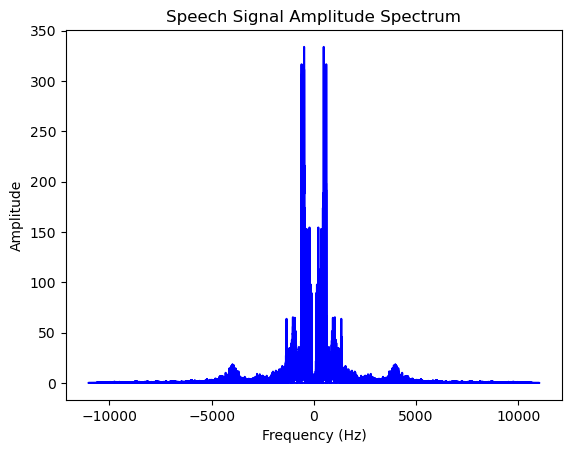

In [34]:
plt.plot(frequencies, amplitude,color = "blue")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Amplitude Spectrum")
plt.show()

A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

In [35]:
time_domain = np.fft.ifft(fft_data)
time_domain = time_domain[:len(signal)]


C:\Users\Somu\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


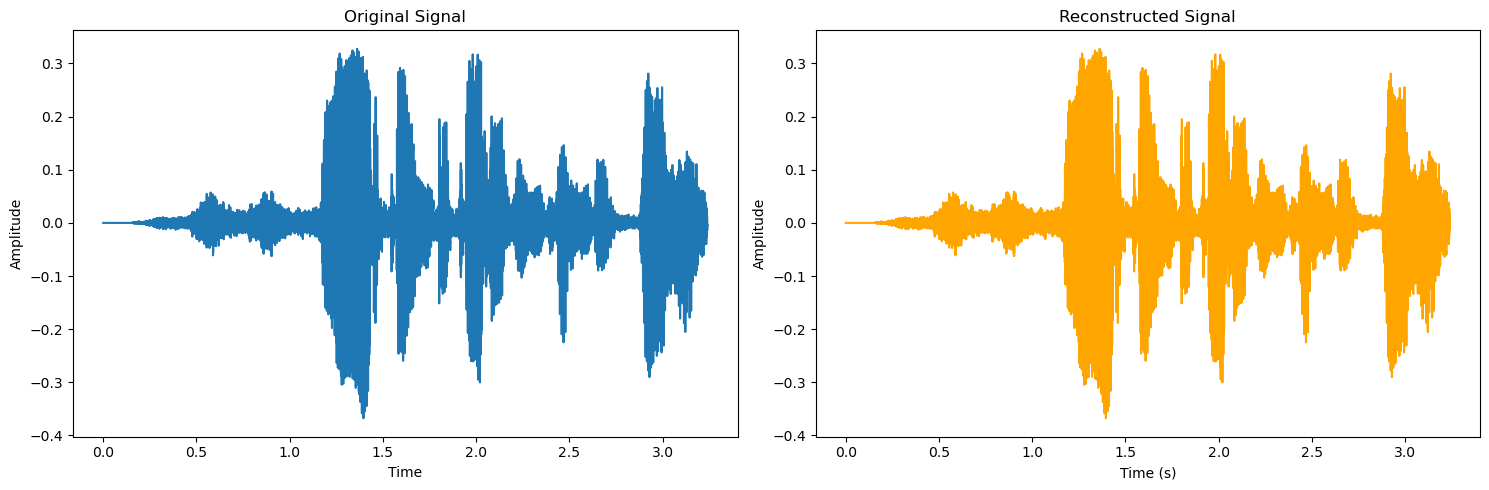

In [36]:
time = np.linspace(0, len(signal)/sr, len(signal))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time,signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, time_domain,color = "orange")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()

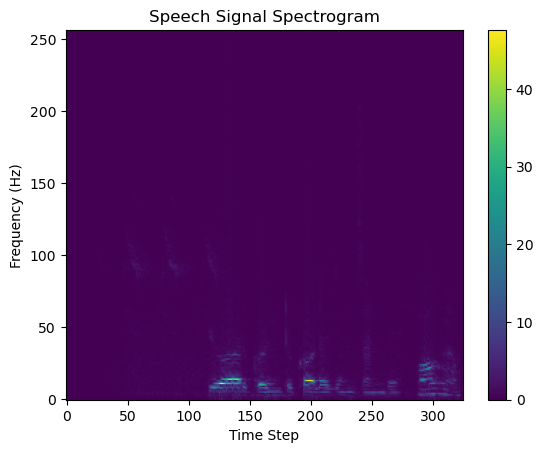

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

signal, sr = librosa.load("Lab04_Statement.mp3")
window_size = int(sr * 0.02)
hop_size = int(window_size / 2)
fft_size = 2 ** int(np.ceil(np.log2(window_size)))
freq_components = np.zeros((fft_size // 2 + 1, int(np.ceil(len(signal) / hop_size))))
for i in range(0, len(signal) - window_size + 1, hop_size):
    window = signal[i:i + window_size]
    padded_window = np.pad(window, (0, fft_size - len(window)), mode="constant")
    fft_result = np.fft.rfft(padded_window)
    freq_components[:, i // hop_size] = np.abs(fft_result[:fft_size // 2 + 1])  # Keep positive frequencies

plt.imshow(freq_components, aspect="auto", origin="lower")
plt.xlabel("Time Step")
plt.ylabel("Frequency (Hz)")
plt.title("Speech Signal Spectrogram")
plt.colorbar()
plt.show()


A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

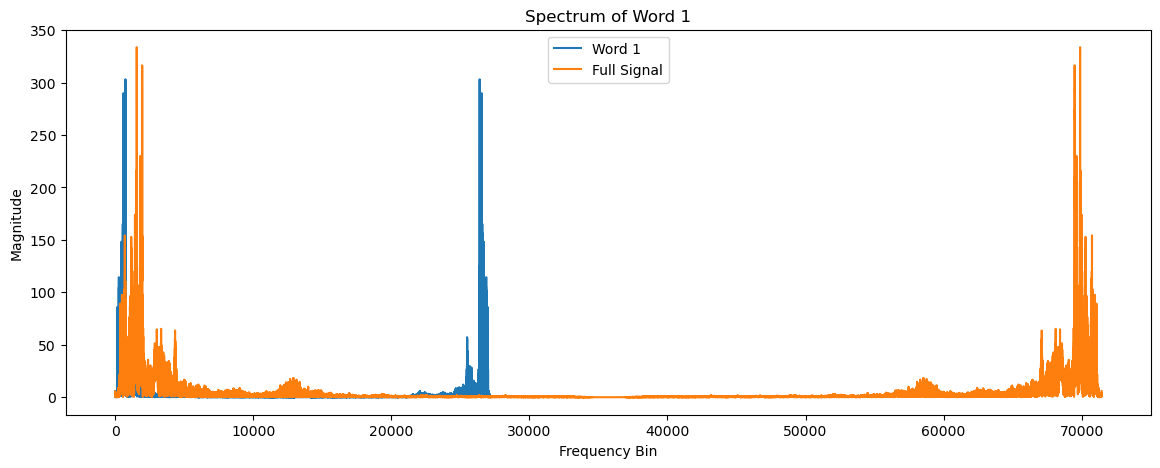

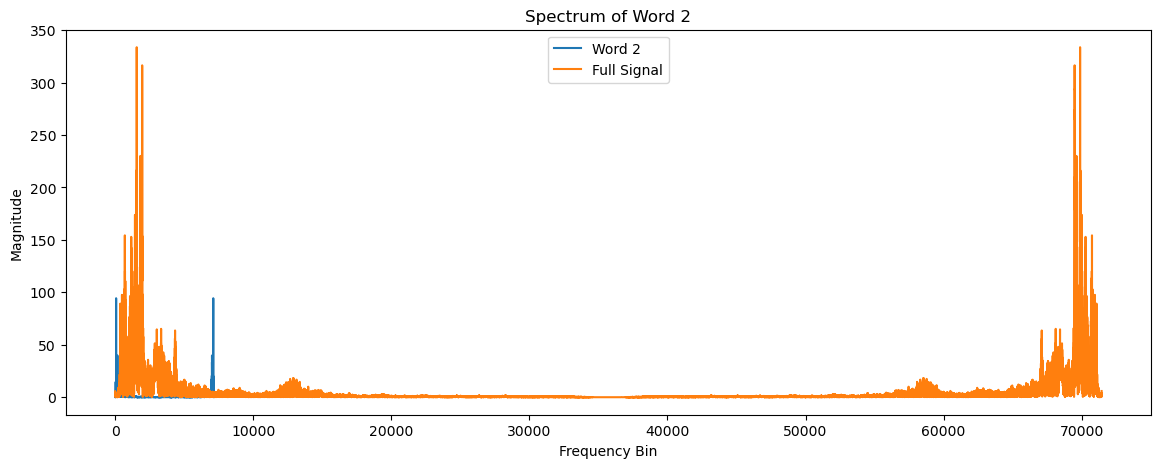

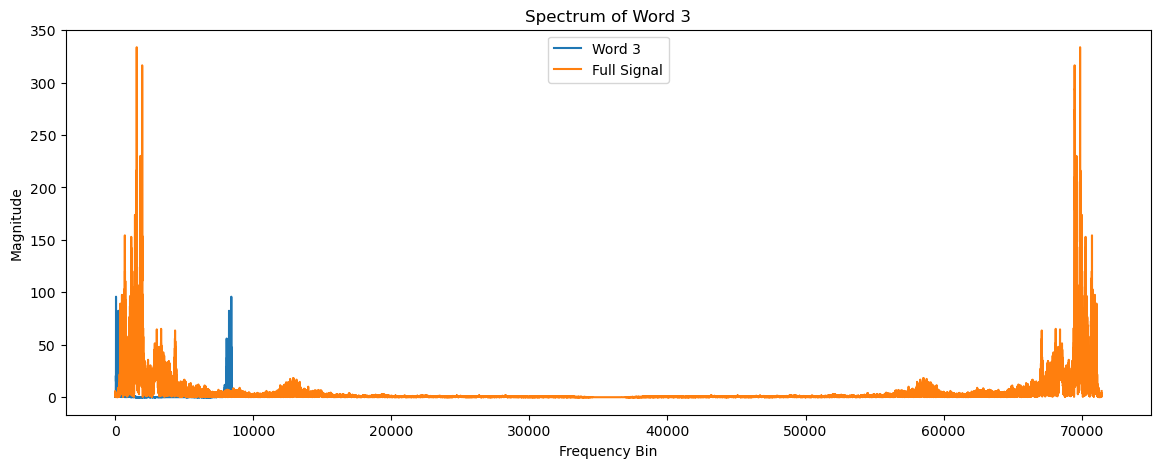

In [40]:

import numpy as np
import matplotlib.pyplot as plt
import librosa

speech_signal, rs = librosa.load("Lab04_Statement.mp3")

threshold = np.percentile(np.abs(speech_signal), 92)
segments = librosa.effects.split(speech_signal, top_db=-20 * np.log10(threshold))
for i, (start, end) in enumerate(segments):
    word = speech_signal[start:end]
    D_full = np.fft.fft(speech_signal)
    D_word = np.fft.fft(word)
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word), label=f'Word {i+1}')
    plt.plot(np.abs(D_full), label='Full Signal')

    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

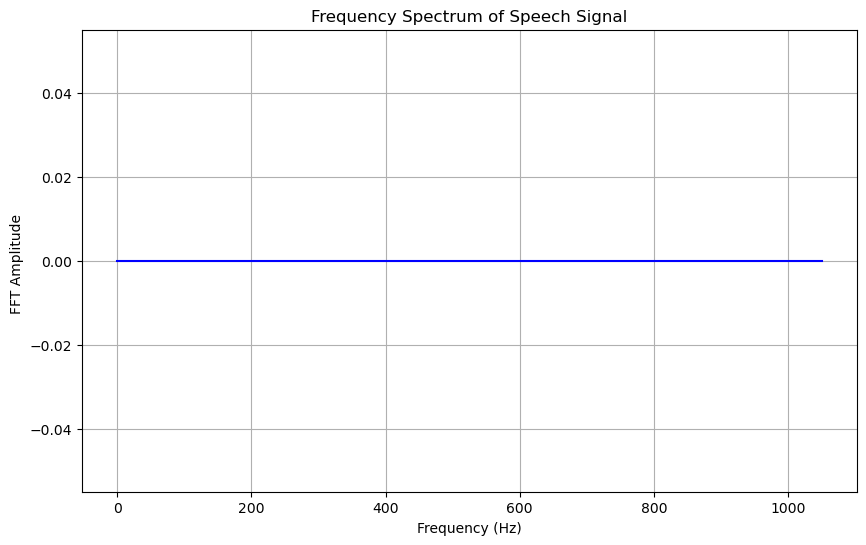

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

sr=2250
window_duration = 0.02
window_samples = int(window_duration * sr)
windowed_signal = signal[:window_samples]

# Compute the FFT
X = fft(windowed_signal)

# Get the one-sided spectrum
n_oneside = window_samples // 2
frequencies = np.arange(n_oneside) * (sr / window_samples)
spectrum = np.abs(X[:n_oneside])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude ')
plt.title('Frequency Spectrum of Speech Signal')
plt.grid(True)
plt.show()

A5. Break your speech signal into window lengths of 20 mSec intervals.Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix.You may use librosa.stft()or scipy.signal.stft()as well to achieve this.

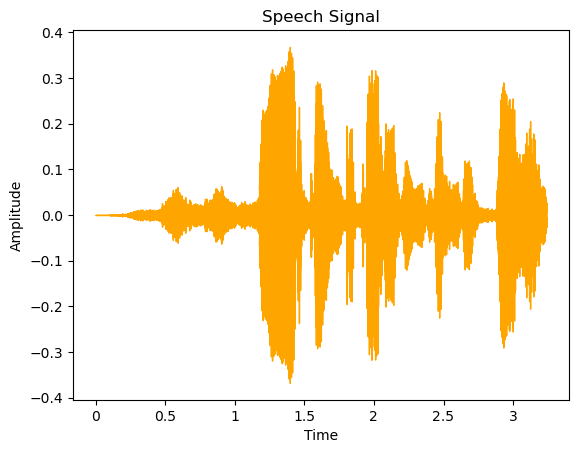

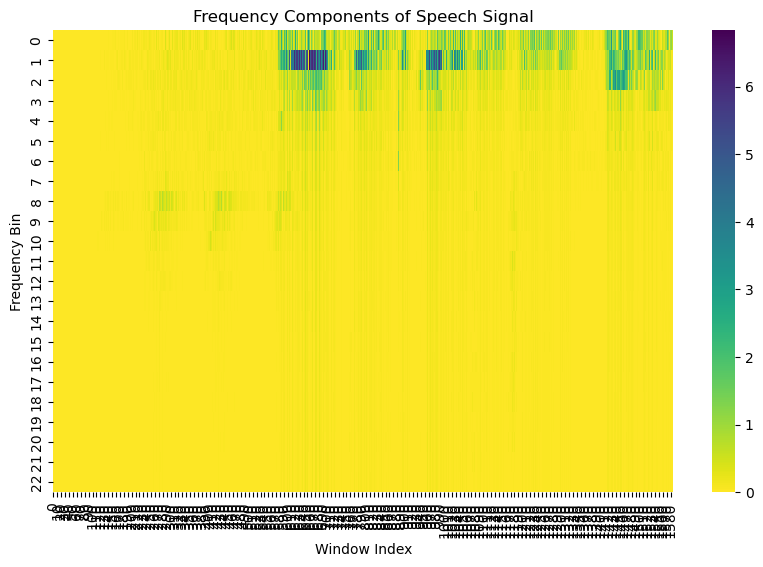

In [43]:
import seaborn as sns

y, rs = librosa.load('Lab04_Statement.mp3')
librosa.display.waveshow(y, sr=rs, color = 'orange')
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
window_length_sec = 0.02
window_length = int(window_length_sec * sr)
num_windows = len(y) // window_length
freq_matrix = np.zeros((num_windows, window_length // 2 + 1))
for i in range(num_windows):
    window = y[i * window_length: (i + 1) * window_length]
    fft_result = np.fft.rfft(window)
    freq_matrix[i, :] = np.abs(fft_result)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(freq_matrix.T, cmap='viridis_r', xticklabels=10)
plt.title('Frequency Components of Speech Signal')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.show()

A6. Use scipy.signal.spectrogram()to plot the spectrogram of the speech signal at the same duration. Compare the plots.

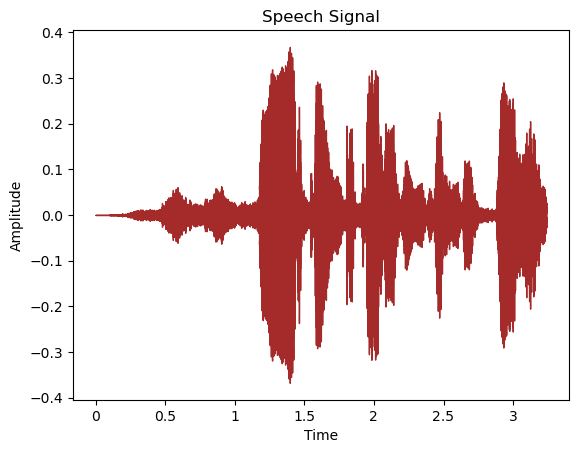

C:\Users\Somu\AppData\Local\Temp\ipykernel_17648\590411667.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


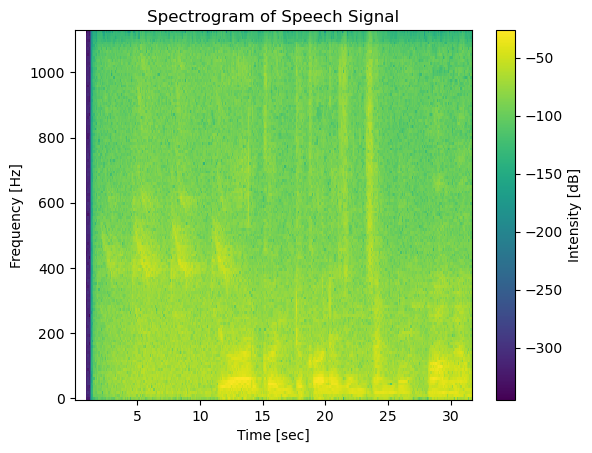

In [44]:
from scipy.signal import spectrogram

librosa.display.waveshow(y, color = 'brown')
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()